# Examples and Exercises from Think Stats, 2nd Edition

http://thinkstats2.com

Copyright 2016 Allen B. Downey

MIT License: https://opensource.org/licenses/MIT


In [5]:
from __future__ import print_function, division

import nsfg

## Examples from Chapter 1

Read NSFG data into a Pandas DataFrame.

In [7]:
preg = nsfg.ReadFemPreg()
preg.head()

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,laborfor_i,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb
0,1,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,8.8125
1,1,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,7.8750
2,2,1,NaN,NaN,NaN,NaN,5.0,NaN,3.0,5.0,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,9.1250
3,2,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,7.0000
4,2,3,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,6.1875


Print the column names.

In [58]:
preg.columns

Index(['caseid', 'pregordr', 'howpreg_n', 'howpreg_p', 'moscurrp', 'nowprgdk',
       'pregend1', 'pregend2', 'nbrnaliv', 'multbrth',
       ...
       'religion_i', 'metro_i', 'basewgt', 'adj_mod_basewgt', 'finalwgt',
       'secu_p', 'sest', 'cmintvw', 'totalwgt_lb', 'totalwgt_kg'],
      dtype='object', length=245)

Select a single column name.

In [9]:
preg.columns[1]

'pregordr'

Select a column and check what type it is.

In [10]:
pregordr = preg['pregordr']
type(pregordr)

pandas.core.series.Series

Print a column.

In [11]:
pregordr

0        1
1        2
2        1
3        2
4        3
        ..
13588    1
13589    2
13590    3
13591    4
13592    5
Name: pregordr, Length: 13593, dtype: int64

Select a single element from a column.

In [12]:
pregordr[0]

1

Select a slice from a column.

In [13]:
pregordr[2:5]

2    1
3    2
4    3
Name: pregordr, dtype: int64

Select a column using dot notation.

In [17]:
pregordr = preg.pregordr

Count the number of times each value occurs.

In [15]:
preg.outcome.value_counts().sort_index()

1    9148
2    1862
3     120
4    1921
5     190
6     352
Name: outcome, dtype: int64

Check the values of another variable.

In [18]:
preg.birthwgt_lb.value_counts().sort_index()

0.0        8
1.0       40
2.0       53
3.0       98
4.0      229
5.0      697
6.0     2223
7.0     3049
8.0     1889
9.0      623
10.0     132
11.0      26
12.0      10
13.0       3
14.0       3
15.0       1
Name: birthwgt_lb, dtype: int64

Make a dictionary that maps from each respondent's `caseid` to a list of indices into the pregnancy `DataFrame`.  Use it to select the pregnancy outcomes for a single respondent.

In [19]:
caseid = 10229
preg_map = nsfg.MakePregMap(preg)
indices = preg_map[caseid]
preg.outcome[indices].values

array([4, 4, 4, 4, 4, 4, 1])

## Exercises

Select the `birthord` column, print the value counts, and compare to results published in the [codebook](http://www.icpsr.umich.edu/nsfg6/Controller?displayPage=labelDetails&fileCode=PREG&section=A&subSec=8016&srtLabel=611933)

In [30]:
# Solution goes here
# The link to the codebook is broken. 

preg.birthord.value_counts().sort_index()

1.0     4413
2.0     2874
3.0     1234
4.0      421
5.0      126
6.0       50
7.0       20
8.0        7
9.0        2
10.0       1
Name: birthord, dtype: int64

We can also use `isnull` to count the number of nans.

In [21]:
preg.birthord.isnull().sum()

4445

Select the `prglngth` column, print the value counts, and compare to results published in the [codebook](http://www.icpsr.umich.edu/nsfg6/Controller?displayPage=labelDetails&fileCode=PREG&section=A&subSec=8016&srtLabel=611931)

In [29]:
# Solution goes here

preg.prglngth.value_counts().sort_index()

0       15
1        9
2       78
3      151
4      412
5      181
6      543
7      175
8      409
9      594
10     137
11     202
12     170
13     446
14      29
15      39
16      44
17     253
18      17
19      34
20      18
21      37
22     147
23      12
24      31
25      15
26     117
27       8
28      38
29      23
30     198
31      29
32     122
33      50
34      60
35     357
36     329
37     457
38     609
39    4744
40    1120
41     591
42     328
43     148
44      46
45      10
46       1
47       1
48       7
50       2
Name: prglngth, dtype: int64

To compute the mean of a column, you can invoke the `mean` method on a Series.  For example, here is the mean birthweight in pounds:

In [31]:
preg.totalwgt_lb.mean()

7.265628457623368

Create a new column named <tt>totalwgt_kg</tt> that contains birth weight in kilograms.  Compute its mean.  Remember that when you create a new column, you have to use dictionary syntax, not dot notation.

In [42]:
# Solution goes here

preg['totalwgt_kg'] = preg.totalwgt_lb * .4535924
preg.totalwgt_kg.mean()

3.295633849601682

`nsfg.py` also provides `ReadFemResp`, which reads the female respondents file and returns a `DataFrame`:

In [43]:
resp = nsfg.ReadFemResp()

`DataFrame` provides a method `head` that displays the first five rows:

In [44]:
resp.head()

,caseid,rscrinf,rdormres,rostscrn,rscreenhisp,rscreenrace,age_a,age_r,cmbirth,agescrn,...,pubassis_i,basewgt,adj_mod_basewgt,finalwgt,secu_r,sest,cmintvw,cmlstyr,screentime,intvlngth
0,2298,1,5,5,1,5.0,27,27,902,27,...,0,3247.916977,5123.759559,5556.717241,2,18,1234,1222,18:26:36,110.492667
1,5012,1,5,1,5,5.0,42,42,718,42,...,0,2335.279149,2846.799490,4744.191350,2,18,1233,1221,16:30:59,64.294000
2,11586,1,5,1,5,5.0,43,43,708,43,...,0,2335.279149,2846.799490,4744.191350,2,18,1234,1222,18:19:09,75.149167
3,6794,5,5,4,1,5.0,15,15,1042,15,...,0,3783.152221,5071.464231,5923.977368,2,18,1234,1222,15:54:43,28.642833
4,616,1,5,4,1,5.0,20,20,991,20,...,0,5341.329968,6437.335772,7229.128072,2,18,1233,1221,14:19:44,69.502667


Select the `age_r` column from `resp` and print the value counts.  How old are the youngest and oldest respondents?

In [48]:
# Solution goes here
resp.age_r.value_counts().sort_index()

15    217
16    223
17    234
18    235
19    241
20    258
21    267
22    287
23    282
24    269
25    267
26    260
27    255
28    252
29    262
30    292
31    278
32    273
33    257
34    255
35    262
36    266
37    271
38    256
39    215
40    256
41    250
42    215
43    253
44    235
Name: age_r, dtype: int64

We can use the `caseid` to match up rows from `resp` and `preg`.  For example, we can select the row from `resp` for `caseid` 2298 like this:

In [49]:
resp[resp.caseid==2298]

,caseid,rscrinf,rdormres,rostscrn,rscreenhisp,rscreenrace,age_a,age_r,cmbirth,agescrn,...,pubassis_i,basewgt,adj_mod_basewgt,finalwgt,secu_r,sest,cmintvw,cmlstyr,screentime,intvlngth
0,2298,1,5,5,1,5.0,27,27,902,27,...,0,3247.916977,5123.759559,5556.717241,2,18,1234,1222,18:26:36,110.492667


And we can get the corresponding rows from `preg` like this:

In [50]:
preg[preg.caseid==2298]

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb,totalwgt_kg
2610,2298,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,3247.916977,5123.759559,5556.717241,2,18,NaN,6.8750,3.118448
2611,2298,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,3247.916977,5123.759559,5556.717241,2,18,NaN,5.5000,2.494758
2612,2298,3,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,3247.916977,5123.759559,5556.717241,2,18,NaN,4.1875,1.899418
2613,2298,4,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,3247.916977,5123.759559,5556.717241,2,18,NaN,6.8750,3.118448


How old is the respondent with `caseid` 1?

In [53]:
# Solution goes here
resp[resp.caseid==1].age_r

1069    44
Name: age_r, dtype: int64

What are the pregnancy lengths for the respondent with `caseid` 2298?

In [55]:
# Solution goes here

preg[preg.caseid==2298].prglngth

2610    40
2611    36
2612    30
2613    40
Name: prglngth, dtype: int64

What was the birthweight of the first baby born to the respondent with `caseid` 5012?

In [60]:
# Solution goes here

preg[preg.caseid==5012].birthwgt_lb

5515    6.0
Name: birthwgt_lb, dtype: float64

In [2]:
"""
Exercise 1-2 
Lincoln Brown
Assignment 3.2 Ex 1-2
DSC530-T301
Dr. Parajulee

chap01ex_LincolnBrown.py


"""
import numpy as np
import thinkstats2
from collections import defaultdict

def ReadFemPreg(dct_file='2002FemPreg.dct',
                dat_file='2002FemPreg.dat.gz'):
    """Reads the NSFG pregnancy data.

    dct_file: string file name
    dat_file: string file name

    returns: DataFrame
    """
    dct = thinkstats2.ReadStataDct(dct_file)
    df = dct.ReadFixedWidth(dat_file, compression='gzip')
    CleanFemPreg(df)
    return df

def CleanFemPreg(df):
    """Recodes variables from the pregnancy frame.

    df: DataFrame
    """
    # mother's age is encoded in centiyears; convert to years
    df.agepreg /= 100.0

    # birthwgt_lb contains at least one bogus value (51 lbs)
    # replace with NaN
    df.loc[df.birthwgt_lb > 20, 'birthwgt_lb'] = np.nan
    
    # replace 'not ascertained', 'refused', 'don't know' with NaN
    na_vals = [97, 98, 99]
    df.birthwgt_lb.replace(na_vals, np.nan, inplace=True)
    df.birthwgt_oz.replace(na_vals, np.nan, inplace=True)
    df.hpagelb.replace(na_vals, np.nan, inplace=True)

    df.babysex.replace([7, 9], np.nan, inplace=True)
    df.nbrnaliv.replace([9], np.nan, inplace=True)

    # birthweight is stored in two columns, lbs and oz.
    # convert to a single column in lb
    # NOTE: creating a new column requires dictionary syntax,
    # not attribute assignment (like df.totalwgt_lb)
    df['totalwgt_lb'] = df.birthwgt_lb + df.birthwgt_oz / 16.0    

    # due to a bug in ReadStataDct, the last variable gets clipped;
    # so for now set it to NaN
    df.cmintvw = np.nan

def ReadFemResp(dct_file='2002FemResp.dct',
                dat_file='2002FemResp.dat.gz',
                nrows=None):
    """Reads the NSFG respondent data.

    dct_file: string file name
    dat_file: string file name

    returns: DataFrame
    """
    dct = thinkstats2.ReadStataDct(dct_file)
    df = dct.ReadFixedWidth(dat_file, compression='gzip', nrows=nrows)
    CleanFemResp(df)
    return df

def CleanFemResp(df):
    """Recodes variables from the respondent frame.

    df: DataFrame
    """
    pass

def MakePregMap(df):
    """Make a map from caseid to list of preg indices.

    df: DataFrame

    returns: dict that maps from caseid to list of indices into `preg`
    """
    d = defaultdict(list)
    for index, caseid in df.caseid.iteritems():
        d[caseid].append(index)
    return d

def ValidatePregnum(resp):
    """
        Validate the number of pregnanices in the respondent DataFrame (resp)
    """
    #Load the pregnancy DataFrame
    preg = ReadFemPreg()
    
    #Make a map using MakePregMap
    preg_map = MakePregMap(preg)
    
    for index, pregnum in resp.pregnum.items():
        caseid = resp.caseid[index]
        indices = preg_map[caseid]
        
        
        #return False if pregnum does not equal # of records in pregnancy file
        if len(indices) != pregnum:
            print(caseid, len(indices), pregnum)
            return False
    
    return True
        


def main():
    resp = ReadFemResp()
    #print(resp.head())
    #print(resp.describe())
    #print(resp["pregnum"])
    assert(resp.pregnum.value_counts()[1] == 1267) #Number of records that indicate live birth
    assert(len(resp["pregnum"]) == 7643)
    assert(ValidatePregnum(resp))
    
    
    print("All tests passed.")
    
if __name__ == "__main__":
    main()


All tests passed.


No handles with labels found to put in legend.


Mean
First Babies: 7.201094430437772
Others: 7.325855614973262
Variance
First babies: 2.018027300915786
Other babies: 1.9437810258964716
Difference in lbs -0.12476118453549034
Difference in oz -1.9961789525678455
Difference relative to mean (%age points) {(mean_firsts - mean_others) / mean_live * 100}
Cohen d: -0.08867292707260174
39 4693
40 1116
38 607
41 587
37 455


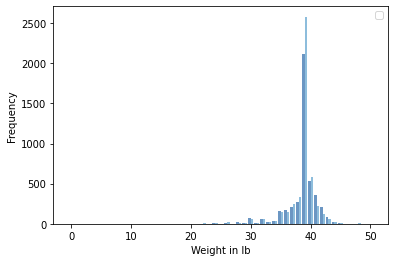

Neither the Cohen d of birth weight: -0.08867292707260174, nor the d of length of pregnancy 0.028879044654449834 are significant.
First born children may be about 2 ounces heavier than other children.


<Figure size 576x432 with 0 Axes>

In [27]:
"""
Exercise 2-1
Lincoln Brown


Based on the results in this chapter, suppose you were asked to summarize what you learned about whether 
first babies arrive late.


Which summary statistics would you use if you wanted to get a story on the evening news?
Using variance to show how wide of a spread the data had would be one way to make the small difference more
headline worthy, or you could use an outlier statistic or bin to illustrate that there are more occurences of
first babies at 41, 42, and 43 weeks. 

Which ones would you use if you wanted to reassure an anxious patient?
The mean or effect size would be a good statistic to use to reassure an anxious patient.
Telling the patient that on average, first babies are born at 38 weeks could be reassuring. 


The Straight Dope:

Do first babies arrive late?

Data in the Nation Survey of Family Growth Cycle 6 indicate that on average, first babies do not arrive late. 
In fact, the average for first born babies is 38 weeks. The effect size of the average pregnancy for a first-born vs
nonfirst-born is about 0.2%. The relatively minor difference between these averages would indicate that there is
little difference between the length of pregnancies for first-borns vs nonfirst-born children. 


Exercise 2-4:
 
"""
import thinkstats2 
import thinkplot
import math
from operator import itemgetter


def CleanFemResp(df):
    """Recodes variables from the respondent frame.

    df: DataFrame
    """
    pass


def ReadFemPreg(dct_file='2002FemPreg.dct',
                dat_file='2002FemPreg.dat.gz'):
    """Reads the NSFG pregnancy data.

    dct_file: string file name
    dat_file: string file name

    returns: DataFrame
    """
    dct = thinkstats2.ReadStataDct(dct_file)
    df = dct.ReadFixedWidth(dat_file, compression='gzip')
    CleanFemPreg(df)
    return df


def CleanFemPreg(df):
    """Recodes variables from the pregnancy frame.

    df: DataFrame
    """
    # mother's age is encoded in centiyears; convert to years
    df.agepreg /= 100.0

    # birthwgt_lb contains at least one bogus value (51 lbs)
    # replace with NaN
    df.loc[df.birthwgt_lb > 20, 'birthwgt_lb'] = np.nan
    
    # replace 'not ascertained', 'refused', 'don't know' with NaN
    na_vals = [97, 98, 99]
    df.birthwgt_lb.replace(na_vals, np.nan, inplace=True)
    df.birthwgt_oz.replace(na_vals, np.nan, inplace=True)
    df.hpagelb.replace(na_vals, np.nan, inplace=True)

    df.babysex.replace([7, 9], np.nan, inplace=True)
    df.nbrnaliv.replace([9], np.nan, inplace=True)

    # birthweight is stored in two columns, lbs and oz.
    # convert to a single column in lb
    # NOTE: creating a new column requires dictionary syntax,
    # not attribute assignment (like df.totalwgt_lb)
    df['totalwgt_lb'] = df.birthwgt_lb + df.birthwgt_oz / 16.0    

    # due to a bug in ReadStataDct, the last variable gets clipped;
    # so for now set it to NaN
    df.cmintvw = np.nan

    
def Mode(hist):
    """
    Returns the value with the highest frequency (mode)
    
    hist: Hist object
    
    returns: value from hist
    """
    
    p, x = max([(p,x) for x,p in hist.Items()])
    return x

def AllModes(hist):
    """
    Returns value-freq pairs in decreasing order of frequency.
    
    hist: Hist object
    
    returns: iterator of value-freq pairs.
    
    """
    
    return sorted(hist.Items(), key=itemgetter(1), reverse=True)
    
    
def CohenEffectSize(group1, group2):
    diff = group1.mean() - group2.mean()
    
    var1 = group1.var()
    var2 = group2.var()
    n1, n2 = len(group1), len(group2)
    
    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    d = diff / math.sqrt(pooled_var)
    return d 

def CompareWeights(live, firsts, others):
    """
    Look at the differences between first borns and other babies.
    
    live = DataFrame of all live births
    
    firsts = DataFrame of all first borns
    
    others = DataFrame of all non-first borns
    
    
    """
    
    mean_live = live.totalwgt_lb.mean()
    mean_firsts = firsts.totalwgt_lb.mean()
    mean_others = others.totalwgt_lb.mean()
    
    var_firsts = firsts.totalwgt_lb.var()
    var_others = others.totalwgt_lb.var()
    
    print("Mean")
    print(f"First Babies: {mean_firsts}")
    print(f"Others: {mean_others}")
    
    print("Variance")
    print(f"First babies: {var_firsts}")
    print(f"Other babies: {var_others}")
    
    print(f"Difference in lbs {mean_firsts - mean_others}")
    print(f"Difference in oz {(mean_firsts - mean_others) * 16}")
    
    print("Difference relative to mean (%age points) {(mean_firsts - mean_others) / mean_live * 100}")
    
    d = CohenEffectSize(firsts.totalwgt_lb, others.totalwgt_lb)
    print(f'Cohen d: {d}')
    
    
    
def main():
    preg = ReadFemPreg()
    live = preg[preg.outcome == 1]
    hist = thinkstats2.Hist(live.prglngth)
    firsts = live[live.birthord == 1]
    others = live[live.birthord != 1]
    
    CompareWeights(live, firsts, others)
    mode = Mode(hist)
    assert(mode == 39)
    
    #Test AllModes
    modes = AllModes(hist)
    assert(modes[0][1] == 4693)
    
    for value, freq in modes [:5]:
        print(value,freq)
    
    
    
    firsts_hist = thinkstats2.Hist(firsts.prglngth)
    others_hist = thinkstats2.Hist(others.prglngth)
    width=0.45
    thinkplot.PrePlot(2)
    thinkplot.Hist(firsts_hist, align='right', width=width)
    thinkplot.Hist(others_hist, align='left', width=width)
    thinkplot.Show(xlabel='Weight in lb', ylabel='Frequency')
    d_wgt = CohenEffectSize(firsts.totalwgt_lb, others.totalwgt_lb)
    d_lngth = CohenEffectSize(firsts.prglngth, others.prglngth)
    
    print(f"Neither the Cohen d of birth weight: {d_wgt}, nor the d of length of pregnancy {d_lngth} are significant.")
    print(f"First born children may be about 2 ounces heavier than other children.")


if __name__ == "__main__":
    main()